In [1]:
# The libraries that I used for the part 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Bring out the dataset 
mpg = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", sep='\s+', header = None)

In [3]:
# Rename the Column from the dataset, and delete the last column which is the name of car
mpg.columns = ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
mpg = mpg.drop(['car_name'], axis = 1)
# Standarization of dataset
scaler=StandardScaler()
scaler.fit(mpg)
mpg = scaler.transform(mpg)
# Rename the Column
mpg = pd.DataFrame(mpg,columns=['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'])

In [4]:
# Drop the not suitable columns(Discrete Variables)
mpg = mpg.drop(['origin', 'cylinders', 'model_year'], axis = 1)

In [5]:
# Check out the number of NAs
mpg.isna().sum()

mpg             8
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

In [6]:
# Remove null or NA values
mpg.dropna(inplace = True)
# Remove any redundant rows
mpg.drop_duplicates(inplace = True)

In [7]:
# Find the information about the dataset, and check the NULLs
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 405
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   displacement  391 non-null    float64
 2   horsepower    391 non-null    float64
 3   weight        391 non-null    float64
 4   acceleration  391 non-null    float64
dtypes: float64(5)
memory usage: 18.3 KB


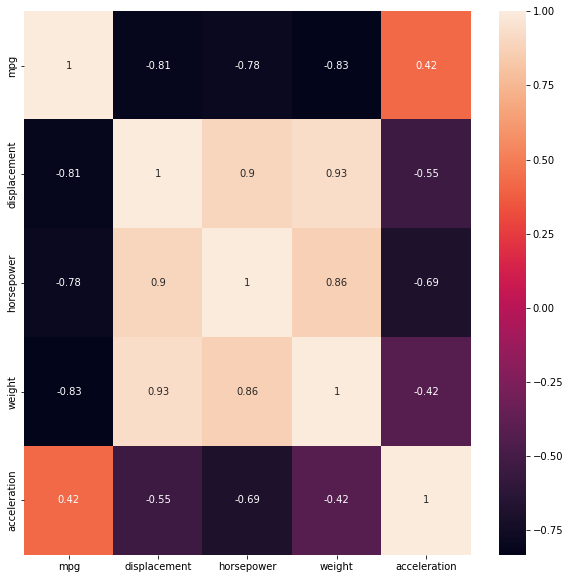

In [8]:
# Making the heatmap plot to check the correlation among the attributes
corr = mpg.corr()
plt.figure(figsize=[10,10])
sns.heatmap(corr,annot=True)

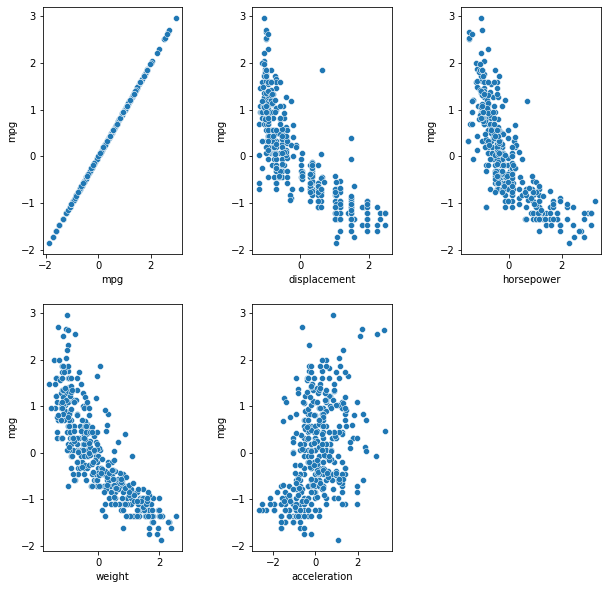

In [9]:
# Making the scatter plot to check the relationship between mpg and other attributes
attributes=list(mpg.columns)
plt.figure(figsize=[10,10])
plt.subplots_adjust(wspace=0.5)
for i in range(len(attributes)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data=mpg,x=mpg[attributes[i]],y='mpg')

In [10]:
# The target of this dataset is MPG, so Y is MPG, and X is the others except for Y
Y = mpg['mpg']
X = mpg.drop(['mpg'], axis=1)

In [11]:
# Split the dataset 80(train) : 20(test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [12]:
# Change the train and test set into dataframe
x_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(Y_train)
x_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(Y_test)

In [13]:
# add the column names axis which is for constant
axis = [1] * len(x_train)
x_train.insert(0, 'axis', axis)
axis = [1] * len(x_test)
x_test.insert(0, 'axis', axis)

In [14]:
# This is the cost function
def cost(data, target, weight):
  m = len(target)
  y_pred = data.dot(weight)
  j_func = (1/(2*m))*np.sum((y_pred - target)**2)
  return j_func

In [15]:
# This is the gradient funcsion
def gradient(data, target, weight, learn_rate, n_iter):
  m = len(target)
  grad_list = [0] * n_iter
  for i in range(n_iter):
    y_pred = pd.DataFrame(data.dot(weight),columns=['mpg'] )
    difference = y_pred - target
    weight = weight - (learn_rate * (1/m)*(data.T.dot(difference)))
    grad_list[i] = cost(data, target, weight)
  return weight, grad_list


In [16]:
theta = pd.DataFrame({'mpg' : [0, 0, 0, 0, 0]}, index = ['axis', 'displacement', 'horsepower', 'weight', 'acceleration'])

theta_pred, grad_list_pred = gradient(x_train, y_train, theta, 0.1, 3000)

In [17]:
# model evaluation for training set
y_train_predict = x_train.dot(theta_pred)
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("--------------------------------------")
print("The model performance for test set")
print("--------------------------------------")
print('MSE is {}'.format(round(mse,5)))
print('R2 score is {}'.format(round(r2,5)))
print("--------------------------------------")
print("\n")

--------------------------------------
The model performance for test set
--------------------------------------
MSE is 0.27171
R2 score is 0.71029
--------------------------------------




In [18]:

# model evaluation for test set
y_test_predict = x_test.dot(theta_pred)
mse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)

print("--------------------------------------")
print("The model performance for test set")
print("--------------------------------------")
print('MSE is {}'.format(round(mse,5)))
print('R2 score is {}'.format(round(r2,5)))
print("--------------------------------------")
print("\n")

--------------------------------------
The model performance for test set
--------------------------------------
MSE is 0.38762
R2 score is 0.64724
--------------------------------------




Text(0.5, 1.0, 'Cost vs Iterations')

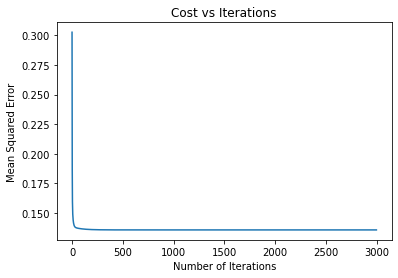

In [19]:
# Making the plot for cost vs iteration
plt.plot(range(3000),grad_list_pred)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations')

In [20]:
# Finding out the optimized iteration
np.argmin(grad_list_pred)

2827

In [21]:
# weight coefficients
theta_pred

,mpg
axis,-0.047322
displacement,-0.077653
horsepower,-0.220943
weight,-0.561113
acceleration,-0.039137
